In [4]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [5]:
import numpy as np

def conv(z, h, omega_lambda, omega_matter):

    H0=100*h
#conversion Mpc --> km
    conv1=1./(1e6*206265*1.496e8)
#conversion de s --> Gyr
    conv2=3600*24*365.25*1e9
    H0=H0*conv1*conv2

    c1=np.sqrt(omega_lambda*(1.+z)**(-3.))+np.sqrt((omega_lambda*(1.+z)**(-3.))+omega_matter)
    ln=np.log(c1/np.sqrt(omega_matter))
    c2=2./(3.*np.sqrt(omega_lambda))
        
    time = (1./H0)*c2*ln

    return time

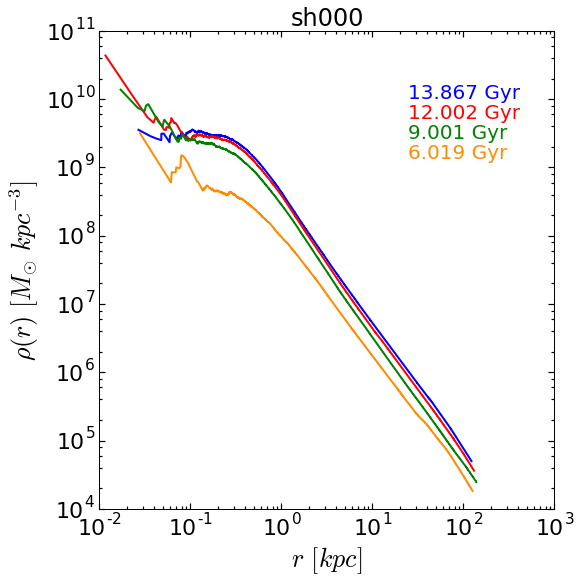

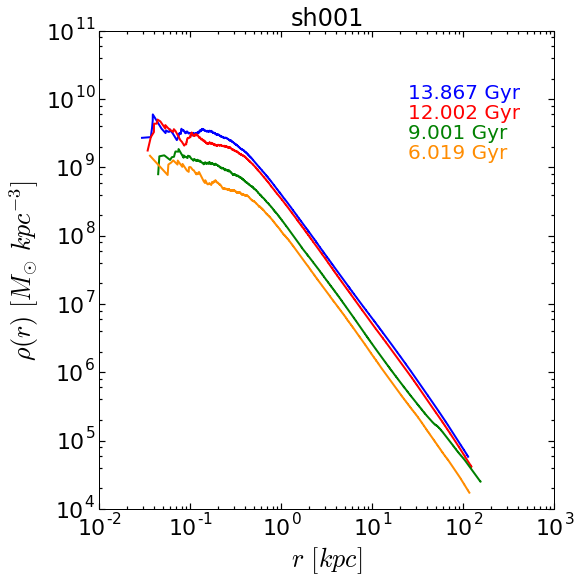

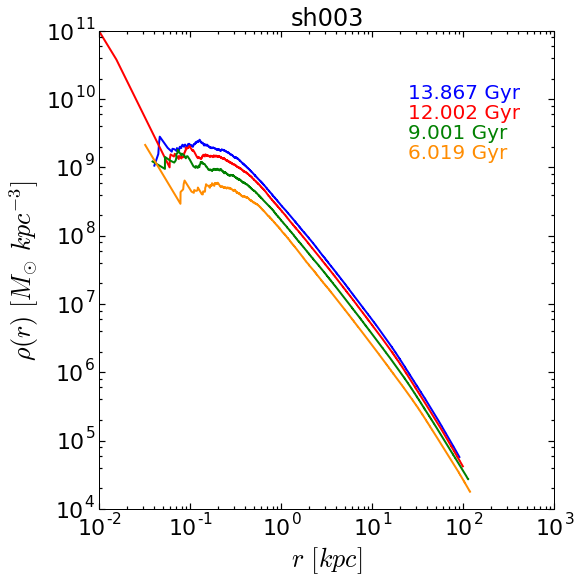

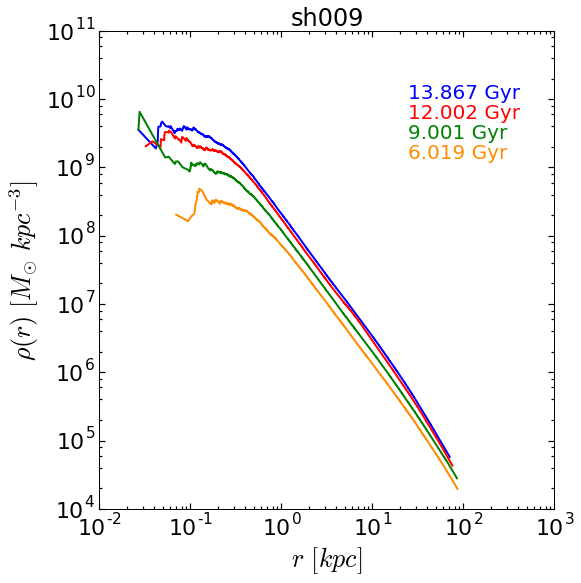

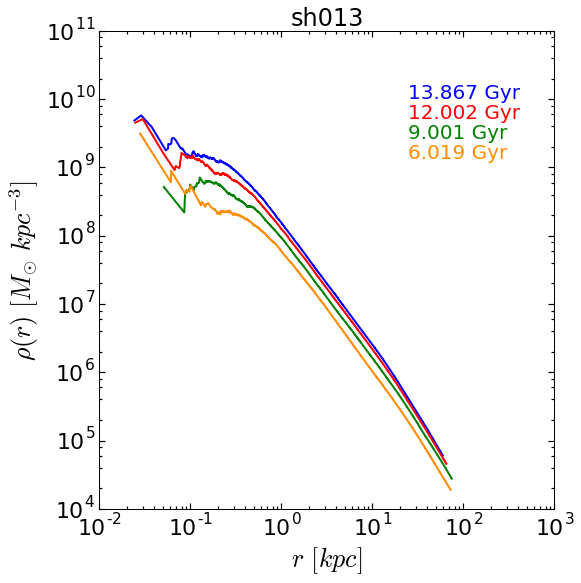

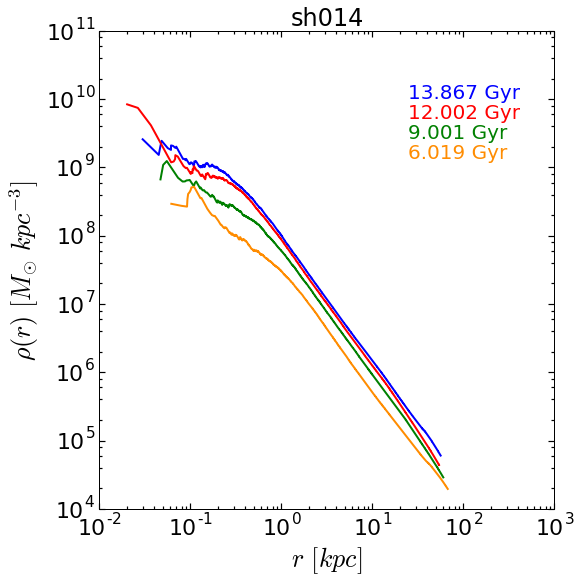

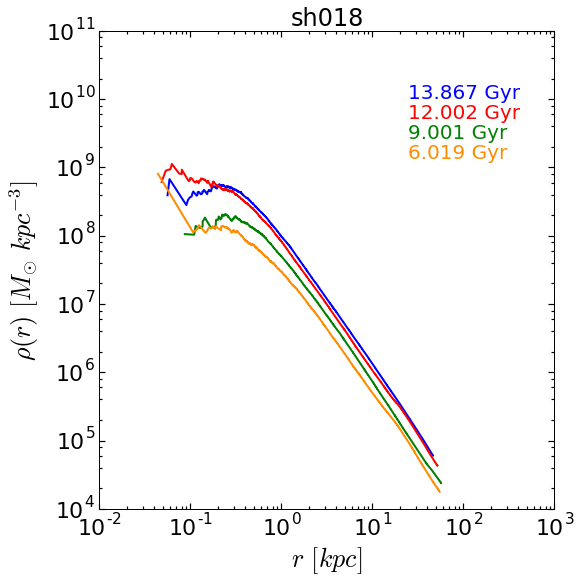

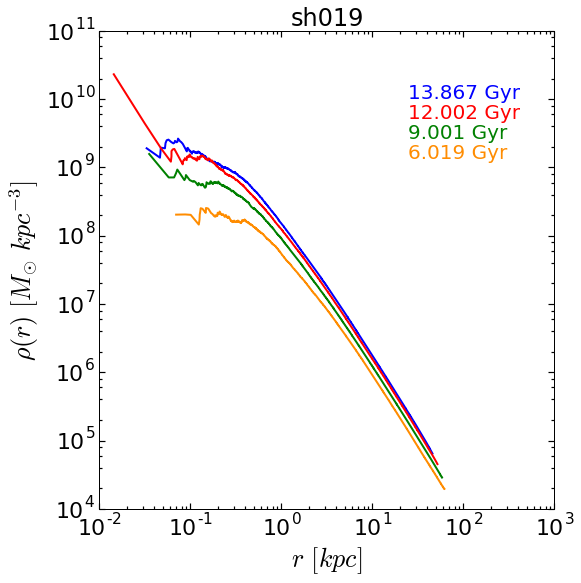

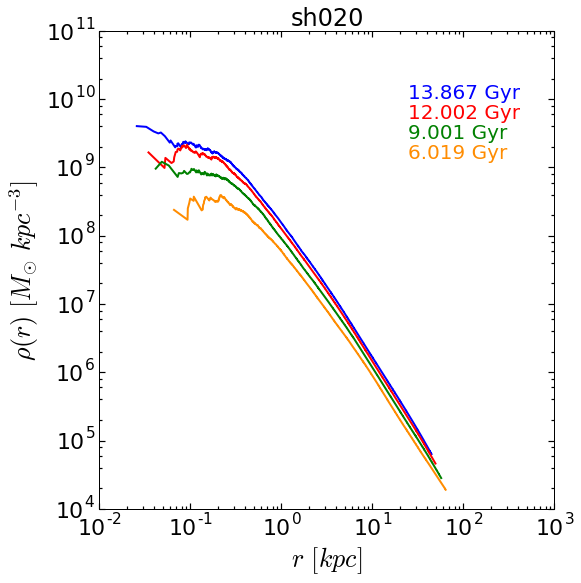

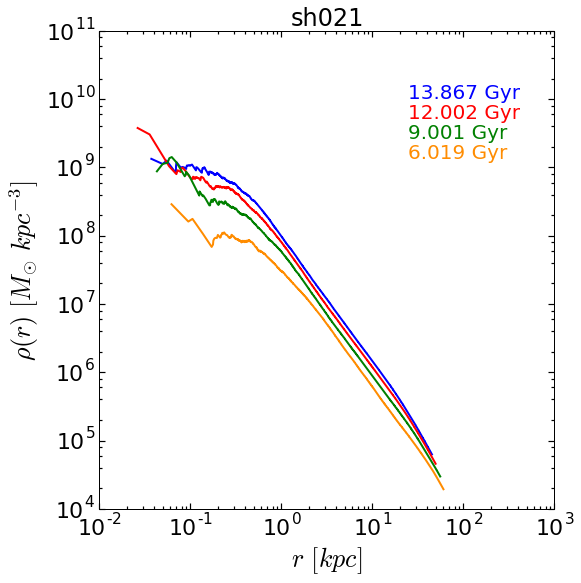

In [3]:
#Perfiles de Materia Oscura --Evolucion
import matplotlib.pyplot as plt
import h5py
import rotation as rot

h=0.732
a0=1
omega_lambda=0.716
omega_matter=0.1277/(h**2.)

vector = ('00','01','03','09','13','14','18','19','20','21')
vect=('blue', 'red', 'green', 'darkorange')
vect2=(0,-20,-40,-60)
k=0
snapshot=(497,426,315,207)
for isnap in snapshot:
    snap = h5py.File('/home/ornela/python/ornella/outputs_1/snap_'+str('%03d'%isnap)+'.h5py', 'r')
    
    a = snap['subhalo_000/Time'].value
    z = (a0/a)-1
    t = conv(z, h, omega_lambda, omega_matter)
    
    for i in range(0,10):
        pdrk = snap['subhalo_0'+ str('%s'%vector[i]) + '/Drk/Coordinates'].value
        cm   = snap['subhalo_0'+ str('%s'%vector[i]) + '/Center'].value
        vel  = snap['subhalo_0'+ str('%s'%vector[i]) + '/Drk/Velocities'].value
        masa = snap['subhalo_0'+ str('%s'%vector[i]) + '/Drk/Masses'].value
        r200 = snap['subhalo_0'+ str('%s'%vector[i]) + '/R200']
        
        
#-------paso las coordenadas respecto al centro de la galaxia--------------------
        xdrk = (pdrk[:,0]-cm[0])/h
        ydrk = (pdrk[:,1]-cm[1])/h
        zdrk = (pdrk[:,2]-cm[2])/h
        r = np.sqrt(xdrk**2+ydrk**2+zdrk**2)
        
#---------masa......................................
        masa = masa/h
        
        limit = np.where(r<r200)
        r_sort = np.sort(r[limit])
        r_indice = np.argsort(r[limit])
                
        Mc = np.cumsum((masa[limit])[r_indice])
        
        M = Mc*1e10
        
#---------------cálculo de la densidad-------------
        vol = (4./3)*pi*r_sort**3
        ro = M/vol
        
        fig=plt.figure(i, figsize=(8,8))
        fig.subplots_adjust(bottom=0.12, left =0.16, right = 0.95, top = 0.95)
        ax=fig.add_subplot(111)
        ax.plot(r_sort,ro,'k', lw=2, color = vect[k])
        ax.set_title('sh0'+ str('%s'%vector[i]), fontsize=24)
        ax.minorticks_on()
        ax.tick_params( labelsize=22)
        ax.tick_params('both', length=3, width=1.2,which='minor')
        ax.tick_params('both', length=6, width=1.2,which='major')  
        ax.set_xlabel(r'$r$ $[kpc]$', fontsize=26)
        ax.set_xscale('log')
        ax.set_ylabel(r'$\rho (r)$ $[M_{\odot}$ $kpc^{-3}]$',fontsize=26)
        ax.set_yscale('log')
        ax.set_xlim(1e-2,1e3)
        ax.set_ylim(1e4,1e11)
        plt.annotate(('%.3f'%t + ' Gyr'), xy=(10**1.5,1e10), xytext=(-10,vect2[k]),
                     textcoords='offset points', fontsize=20, color = vect[k])
        
        fig.savefig('sh_0'+ str('%s'%vector[i]) +'-DMs.png', dpi = 80)
  
        #plt.clf()
    k+=1
plt.show()       

In [2]:
pi

3.141592653589793

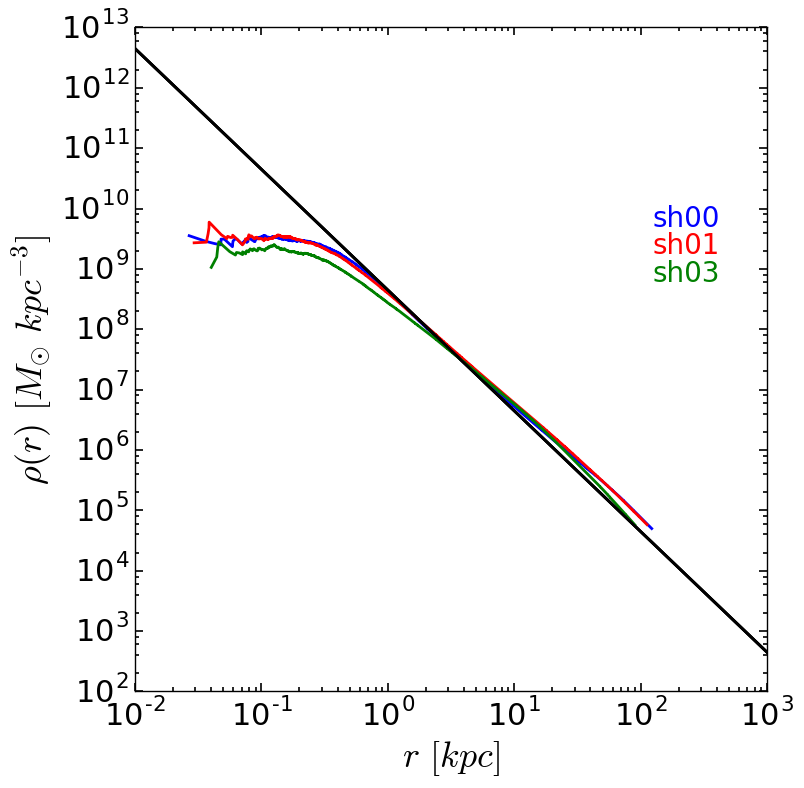

In [88]:
#Perfiles de Materia Oscura
import matplotlib.pyplot as plt
import h5py
import rotation as rot

h=0.732
a0=1
omega_lambda=0.716
omega_matter=0.1277/(h**2.)

vector = ('00','01','03','09','13','14','18','19','20','21')
vect=('blue', 'red', 'green')
vect2=(0,-20,-40,-60)
k=0
snapshot=range(497,496,-1)
for isnap in snapshot:
    snap = h5py.File('/home/ornela/python/ornella/outputs_1/snap_'+str('%03d'%isnap)+'.h5py', 'r')
    
    a = snap['subhalo_000/Time'].value
    z = (a0/a)-1
    t = conv(z, h, omega_lambda, omega_matter)
    
    for i in range(0,3):
        pdrk = snap['subhalo_0'+ str('%s'%vector[i]) + '/Drk/Coordinates'].value
        cm   = snap['subhalo_0'+ str('%s'%vector[i]) + '/Center'].value
        vel  = snap['subhalo_0'+ str('%s'%vector[i]) + '/Drk/Velocities'].value
        masa = snap['subhalo_0'+ str('%s'%vector[i]) + '/Drk/Masses'].value
        r200 = snap['subhalo_0'+ str('%s'%vector[i]) + '/R200']
        
        
#-------paso las coordenadas respecto al centro de la galaxia--------------------
        xdrk = (pdrk[:,0]-cm[0])/h
        ydrk = (pdrk[:,1]-cm[1])/h
        zdrk = (pdrk[:,2]-cm[2])/h
        r = np.sqrt(xdrk**2+ydrk**2+zdrk**2)
        
#---------masa......................................
        masa = masa/h
        
        limit = np.where(r<r200)
        r_sort = np.sort(r[limit])
        r_indice = np.argsort(r[limit])
                
        Mc = np.cumsum((masa[limit])[r_indice])
        
        M = Mc*1e10
        
#---------------cálculo de la densidad-------------
        vol = (4./3)*pi*r_sort**3
        ro = M/vol
        
        '''H0=100*h
        G = 4.3e-9
        #print r200.value
        logc=2.121-0.1*log10(10**11.6)
        c=10**logc
        #print c
        #c=40
        rs=122.3/c
        rr = np.float32(arange(0.01,100,0.05))
        rho_crit= 3*H0**2/(8*pi*G)
        delta=200./3.*c**3/(log(1+c)-(c/(1+c)))
        rho = rho_crit*delta/(rr/rs)/(1+rr/rs)**2'''
        
        #print rho
        
        xx = logspace(-2,3,num=100)
        yy = (10**8.65)*xx**-2
        
        fig=plt.figure(1, figsize=(8,8))
        fig.subplots_adjust(bottom=0.12, left =0.16, right = 0.95, top = 0.95)
        ax=fig.add_subplot(111)
        ax.plot(r_sort,ro,'k', lw=2, color = vect[k])
        ax.plot(xx,yy,'k', lw=2)
        #NFW, = ax.plot(rr,rho/1e9,'--', lw=2, color = 'k', label='perfil NFW')
        #ax.set_title('sh0'+ str('%s'%vector[i]), fontsize=24)
        ax.minorticks_on()
        ax.tick_params( labelsize=22)
        ax.tick_params('both', length=3, width=1.2,which='minor')
        ax.tick_params('both', length=6, width=1.2,which='major')  
        ax.set_xlabel(r'$r$ $[kpc]$', fontsize=26)
        ax.set_xscale('log')
        ax.set_ylabel(r'$\rho (r)$ $[M_{\odot}$ $kpc^{-3}]$',fontsize=26)
        ax.set_yscale('log')
        ax.set_xlim(1e-2,1e3)
        #ax.set_ylim(1e4,10**10.5)
        #plt.legend(handles=[NFW],fontsize=20, frameon=False)
        plt.annotate(('sh'+ str('%s'%vector[i])), xy=(10**2.2,10**9.7), xytext=(-10,vect2[k]),
                     textcoords='offset points', fontsize=20, color = vect[k])
        
        #fig.savefig('sh_0'+ str('%s'%vector[i]) +'-DMs.png', dpi = 80)
  
        #plt.clf()
        k+=1
#fig.savefig('/home/ornela/python/sem1/DM_3.png', dpi = 100)
plt.show()     

In [8]:
xx = np.logspace(-2,3,num=100)
print xx

[  1.00000000e-02   1.12332403e-02   1.26185688e-02   1.41747416e-02
   1.59228279e-02   1.78864953e-02   2.00923300e-02   2.25701972e-02
   2.53536449e-02   2.84803587e-02   3.19926714e-02   3.59381366e-02
   4.03701726e-02   4.53487851e-02   5.09413801e-02   5.72236766e-02
   6.42807312e-02   7.22080902e-02   8.11130831e-02   9.11162756e-02
   1.02353102e-01   1.14975700e-01   1.29154967e-01   1.45082878e-01
   1.62975083e-01   1.83073828e-01   2.05651231e-01   2.31012970e-01
   2.59502421e-01   2.91505306e-01   3.27454916e-01   3.67837977e-01
   4.13201240e-01   4.64158883e-01   5.21400829e-01   5.85702082e-01
   6.57933225e-01   7.39072203e-01   8.30217568e-01   9.32603347e-01
   1.04761575e+00   1.17681195e+00   1.32194115e+00   1.48496826e+00
   1.66810054e+00   1.87381742e+00   2.10490414e+00   2.36448941e+00
   2.65608778e+00   2.98364724e+00   3.35160265e+00   3.76493581e+00
   4.22924287e+00   4.75081016e+00   5.33669923e+00   5.99484250e+00
   6.73415066e+00   7.56463328e+00

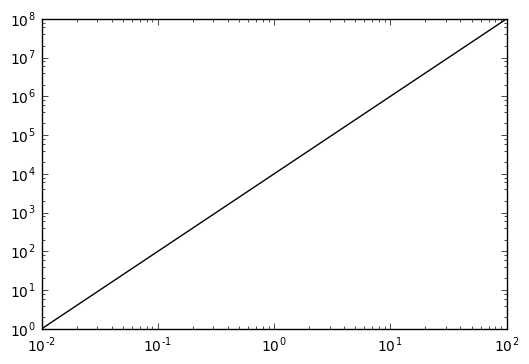

In [92]:
x = np.logspace (-2, 2,num=100)
y = 1e4*x**2
plot(x,y,'k')
pyplot.yscale('log')
pyplot.xscale('log')
